In [67]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [68]:
data=pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [69]:
data.dropna(inplace=True)

In [70]:
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [71]:
data.reset_index(drop=True,inplace=True)

In [72]:
data

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


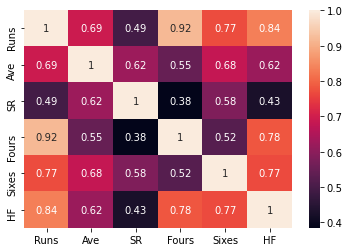

In [73]:
sns.heatmap(data.corr(),annot=True)

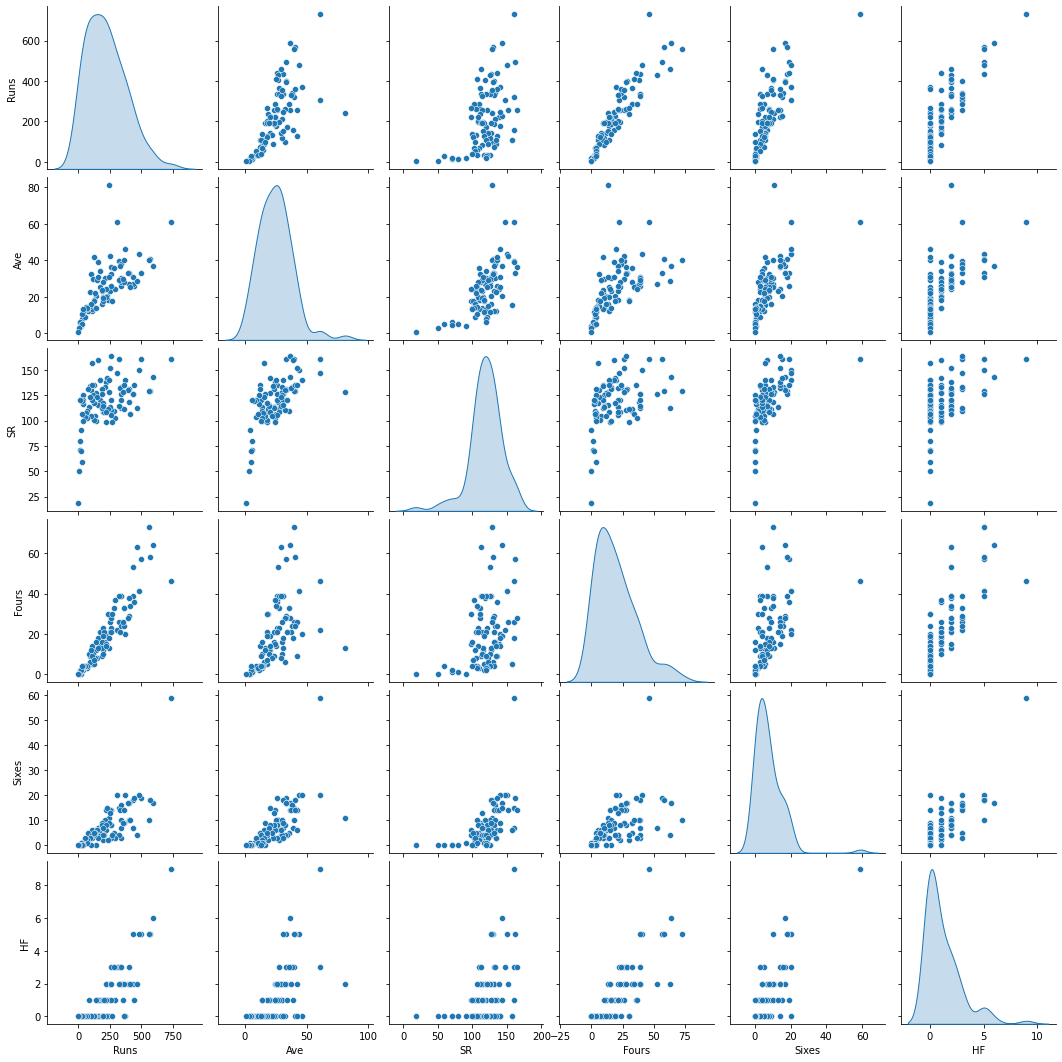

In [74]:
sns.pairplot(data,diag_kind="kde")

In [75]:
data.set_index("Name",inplace=True)

In [76]:
data=data.apply(zscore)

In [77]:
data

,Runs,Ave,SR,Fours,Sixes,HF
Name,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...
Z Khan,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
WD Parnell,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
PC Valthaty,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989


In [78]:
data.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-2.467162e-18,-2.146431e-16,9.868649e-18,2.615192e-16,-2.467162e-18,-3.824102e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-1.402554e+00,-1.789063e+00,-4.292674e+00,-1.213411e+00,-9.523654e-01,-7.079885e-01
25%,-7.847268e-01,-7.431614e-01,-4.428999e-01,-8.301747e-01,-5.753292e-01,-7.079885e-01
50%,-1.508100e-01,-2.140453e-02,4.127095e-02,-2.323263e-01,-1.982931e-01,-4.102363e-01
75%,7.131832e-01,5.512016e-01,5.455270e-01,5.034872e-01,3.044218e-01,4.830202e-01
max,3.301945e+00,4.179184e+00,1.910153e+00,3.262788e+00,6.462679e+00,4.651551e+00


In [79]:
pca=PCA(n_components=6)
pca.fit(data)

PCA(n_components=6)

In [80]:
#eigen values
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


In [81]:
#Eigen vectors
print(pca.components_[0])

[0.4582608  0.39797313 0.3253838  0.40574167 0.41733459 0.43237178]


In [83]:
#variance explained by individual components
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


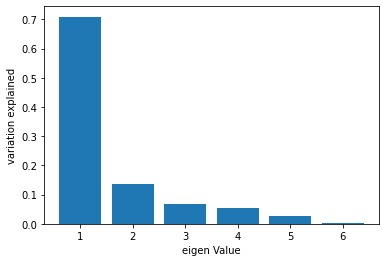

In [84]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,align="center")
plt.ylabel("variation explained")
plt.xlabel("eigen Value")
plt.show()

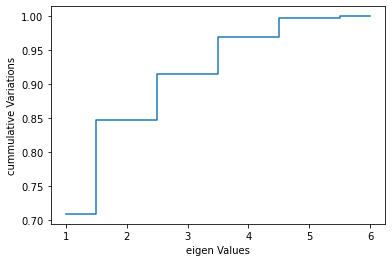

In [85]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_),where="mid")
plt.ylabel("cummulative Variations")
plt.xlabel("eigen Values")
plt.show()

In [86]:
cum_var_exp=np.cumsum(pca.explained_variance_ratio_)
print("Cummulative Variance Explained",cum_var_exp)

Cummulative Variance Explained [0.70911996 0.84696562 0.91563695 0.96988153 0.99718777 1.        ]


### it appears that 4 components explain 96% of variance thus i will go with 4 components

In [91]:
pca1=PCA(n_components=4)

In [92]:
pca1.fit(data)

PCA(n_components=4)

In [93]:
pca1.explained_variance_

array([4.30252561, 0.83636692, 0.41665751, 0.32912443])

In [94]:
#Eigen vectors
print(pca1.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]]


### Reduced features 

In [95]:
Xpca=pca1.transform(data)

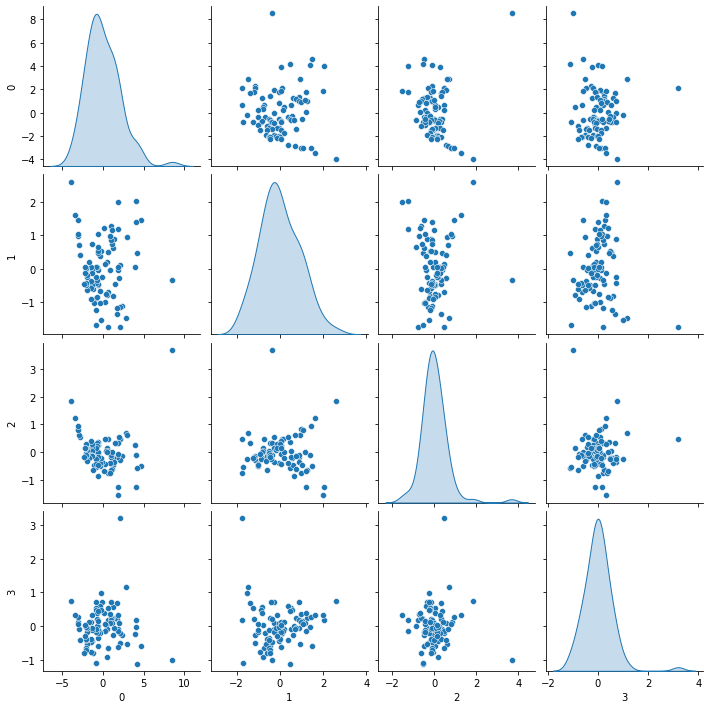

In [130]:
sns.pairplot(pd.DataFrame(Xpca),diag_kind="kde")

In [98]:
Xpca.shape

(90, 4)

- Since the task is to rank the players on the basis of their performance
- The idea behind ranking a player can be seen as
    - Individual Performance Extraction:- Given that a match m is represented as a set of events, PlayeRank models the performance of a player u in m by means of an n-dimensional feature vector p(u,m)=[x1,x2,x3,…,xn], where xi is a feature that describes a specific aspect of u’s behavior in match m and is computed from the set of events played by u in that match. In our dataframe this p(u,m)can be thought of as a row(record of a player).
    - Player Rating:- The evaluation of the performance of a player u in a single match m is computed as the scalar product between the values of the features referring to match m and the feature weights w 
    
    - Formally speaking, given the multi-dimensional vector of features p(u,m)=[x1,x2,x3,…,xn] and their weights w, PlayeRank evaluates the performance of a player u in a match m as follows:
    
                                              r(u,m)=1/R ∑(wi×xi)
              
              The quantity r(u,m) is called the performance rating of u in match m, where R is a normalization constant               such that r(u,m)∈[0,1].
              
    - if we decompose our dataset into eigen vectors and eigen values then the transformed dataset created using eigen vectors will form the n-dimensional feature vector and eigen values will represent the feature weight
    
    - why transformed dataset will be ideal to use is because transformed dataset is combination of all the features taken into account

In [99]:
#calculating player ratings
player_ratings=np.dot(Xpca,pca1.explained_variance_)

In [100]:
player_ratings

array([ 37.54935197,  20.70010848,  17.62184461,  16.84644461,
        18.845023  ,  18.54617216,  11.81060742,  13.43553505,
         8.92333732,   8.72952253,   7.7001388 ,   6.66781   ,
         9.35661363,   8.35848758,   6.65211819,   7.88846429,
         7.86133441,   6.05401445,   8.1787388 ,   9.01915736,
         1.23301191,   5.74268962,   4.72701273,   5.34910891,
         6.56481193,   5.52280305,   2.3231622 ,   5.37228192,
         5.17223559,   1.39242651,   4.40987127,   3.49258273,
         5.727817  ,   3.53999467,   0.78725168,   2.15536683,
         0.12076723,   1.33444009,  -1.92869877,  -0.34175303,
         1.24308911,  -2.6994315 ,  -2.28206628,  -2.95732316,
        -1.29702822,  -4.41533185,  -0.72348437,  -5.59642731,
        -2.32861699,  -4.09474438,  -3.69202187,  -3.35755851,
        -1.63075882,  -2.25005398,  -3.64738647,  -5.61647095,
        -3.34338753,  -2.33095784,  -2.91584856,  -3.73446444,
        -1.77442775,  -3.93195773,  -6.09605957,  -5.60

In [101]:
#appending these rating values to the original dataframe
data["player_rating"]=player_ratings

In [102]:
data

,Runs,Ave,SR,Fours,Sixes,HF,player_rating
Name,,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551,37.549352
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038,20.700108
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533,17.621845
CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533,16.846445
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533,18.845023
...,...,...,...,...,...,...,...
Z Khan,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989,-11.739703
WD Parnell,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989,-11.688061
PC Valthaty,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989,-11.507797


In [107]:
# in pandas we have DataFrame.rank 
#we will use this to rank our players on the basis of Player ratings column
data.sort_values("player_rating",ascending=False, inplace = True)
data["Rank"] = data["player_rating"].rank(ascending=False) 

In [128]:
data

,Runs,Ave,SR,Fours,Sixes,HF,player_rating,Rank
Name,,,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551,37.549352,1.0
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038,20.700108,2.0
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533,18.845023,3.0
AM Rahane,2.188568,1.127500,0.432136,3.262788,0.304422,2.269533,18.546172,4.0
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533,17.621845,5.0
...,...,...,...,...,...,...,...,...
A Mishra,-1.312454,-1.432430,-1.664804,-1.152093,-0.952365,-0.707989,-11.574593,86.0
WD Parnell,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989,-11.688061,87.0
Z Khan,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989,-11.739703,88.0
